# Analysing pollution level using KMeans

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import accuracy_score

In [292]:
dataset=pd.read_csv('cpcb_dly_aq_delhi-2015.csv')

In [293]:
print (dataset.columns)

Index([u'Stn Code', u'Sampling Date', u'State', u'City/Town/Village/Area',
       u'Location of Monitoring Station', u'Agency', u'Type of Location',
       u'SO2', u'NO2', u'RSPM/PM10', u'PM 2.5'],
      dtype='object')


In [294]:
dataset=dataset.drop(dataset.columns[0:7],axis=1)
dataset=dataset.dropna(subset=dataset.columns[:], how='any',axis=0)
print (dataset)

      SO2   NO2  RSPM/PM10  PM 2.5
3     4.0  43.0      204.0    78.0
4     4.0  39.0      192.0    83.0
5     4.0  46.0      159.0   146.0
6     4.0  41.0      267.0    62.0
7     4.0  50.0      235.0   112.0
8     4.0  48.0      241.0    62.0
10    4.0  42.0      268.0    63.0
11    4.0  40.0      210.0   107.0
12    4.0  39.0      210.0    57.0
13    4.0  39.0      199.0    44.0
14    4.0  38.0      199.0    47.0
15    4.0  50.0      187.0    75.0
16    4.0  47.0      219.0    47.0
17    4.0  47.0      178.0    78.0
18    4.0  52.0      174.0    82.0
19    4.0  50.0      206.0    78.0
20    4.0  44.0      243.0    71.0
21    4.0  43.0      228.0    58.0
22    4.0  45.0      229.0    77.0
23    4.0  38.0      219.0    53.0
24    4.0  39.0      209.0    29.0
25    4.0  46.0      121.0    89.0
26    4.0  44.0      156.0    91.0
27    4.0  46.0      132.0    97.0
28    4.0  47.0      123.0    61.0
29    4.0  47.0      302.0   101.0
30    4.0  44.0      329.0    77.0
31    4.0  46.0     

In [295]:
x=dataset
y=dataset[dataset.columns[-1]]

# Plotting input data 

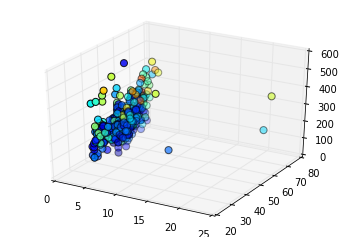

In [296]:
fig=plt.figure()
Axes3D = fig.add_subplot(111, projection='3d')
Axes3D.scatter(xs=np.array(x[dataset.columns[0]]),ys= np.array(x[dataset.columns[1]]),zs= np.array(x[dataset.columns[2]]), s=50, c=np.abs(y), depthshade=True)
plt.show()

# Applying PCA for reducing dimensions 

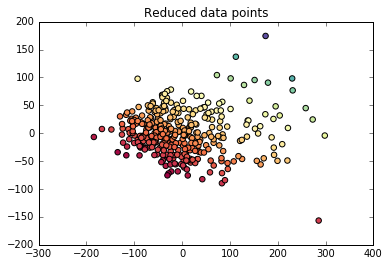

In [297]:
pca=PCA(n_components=2)
x1=pca.fit_transform(x)
fig=plt.figure()
plt.scatter(x1[:,0], x1[:,1],s=30,c=y,cmap=plt.cm.Spectral)
plt.title("Reduced data points")
plt.show()


In [298]:
X1_train=x1[:200]
X1_test=x1[200:]

# Traning model

In [299]:
regr = KMeans(n_clusters=2,random_state=0).fit(x1)

# Plotting output

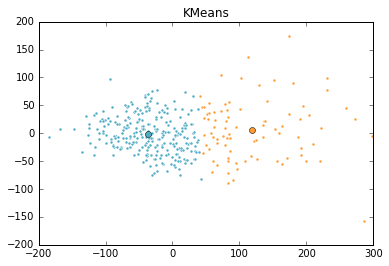

In [300]:
k_means_cluster_centers = np.sort(regr.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(x1, k_means_cluster_centers)
centers = [[1, 1], [-1, -1]]
n_clusters = len(centers)
colors = ['#4EACC5', '#FF9C34']
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(x1[my_members, 0], x1[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
plt.title('KMeans')
plt.show()